# **Odkrywanie Wiedzy i Systemy Rekomendacyjne** - *Laboratorium 3*
## Predykcja oceny z wykorzystaniem pakietu ***surprise***

In [7]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
# Instalacja pakietu surprise
!pip install --upgrade pandas==2.1.4
!pip install --upgrade numpy==1.26.4
!pip install scikit-surprise
!pip install matplotlib

You should consider upgrading via the '/Users/adam/Desktop/PG_OWISR/lab3/venv/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/adam/Desktop/PG_OWISR/lab3/venv/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/adam/Desktop/PG_OWISR/lab3/venv/bin/python3 -m pip install --upgrade pip' command.
  Using cached matplotlib-3.10.1-cp310-cp310-macosx_11_0_arm64.whl (8.0 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 8.3 MB/s eta 0:00:0000:0100:01
  Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 9.4 MB/s eta 0:00:00a 0:00:01
  Using cached kiwisolver-1.4.8-cp310-cp310-macosx_11_0_arm64.whl (65 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.4/253.4 KB 8.2 MB/s eta 0:00:00
You should consider upgrading via the '/Users/adam/Desktop/PG_OWISR/lab3/venv/bin/python3 -m pi

#Wykonaj polecenie **Środowisko wykonawcze -> Uruchom ponownie sesję**.

---



In [3]:
# Wczytanie bibliotek
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from surprise import Dataset, AlgoBase, KNNBasic, SVD, accuracy
from surprise.model_selection import train_test_split, GridSearchCV, cross_validate

W ramach pakietu **surprise** możemy w prosty sposób operować na zbiorze **MovieLens**.

In [4]:
data = Dataset.load_builtin("ml-100k")

Poniższy przykład pokazuje najprostszy sposób oceny błędu dla algorytmu **SVD** z wykorzystaniem walidacji skrośnej.

In [5]:
algo = SVD()

cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=10, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.9335  0.9191  0.9317  0.9270  0.9485  0.9285  0.9344  0.9202  0.9260  0.9294  0.9298  0.0079  
MAE (testset)     0.7359  0.7258  0.7356  0.7324  0.7433  0.7366  0.7340  0.7214  0.7288  0.7277  0.7322  0.0060  
Fit time          0.45    0.50    0.47    0.45    0.45    0.49    0.45    0.47    0.49    0.49    0.47    0.02    
Test time         0.02    0.02    0.05    0.02    0.02    0.02    0.05    0.03    0.02    0.02    0.03    0.01    


{'test_rmse': array([0.93348775, 0.91914283, 0.93171294, 0.92696052, 0.94847909,
        0.92853872, 0.93441995, 0.92015721, 0.92596358, 0.92944811]),
 'test_mae': array([0.73589581, 0.72582478, 0.73557427, 0.7324167 , 0.74328947,
        0.73655855, 0.73399637, 0.72141069, 0.72883292, 0.72773194]),
 'fit_time': (0.45047497749328613,
  0.502892017364502,
  0.469635009765625,
  0.4523930549621582,
  0.4501321315765381,
  0.4868659973144531,
  0.4522521495819092,
  0.4715731143951416,
  0.4938528537750244,
  0.49135470390319824),
 'test_time': (0.02106499671936035,
  0.020805835723876953,
  0.05155801773071289,
  0.0202178955078125,
  0.019805192947387695,
  0.0195920467376709,
  0.0539400577545166,
  0.026664018630981445,
  0.022750139236450195,
  0.01986098289489746)}

## Zadanie 1. (1 pkt)
Wykonaj walidację skrośną dla algorytmu UserKNN z kosinusową miarą podobieństwa.

In [6]:

algo = KNNBasic(sim_options={"name": "cosine", "user_based": True,})
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=10, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    1.0080  1.0221  0.9926  1.0214  1.0140  1.0126 

{'test_rmse': array([1.00800763, 1.02208973, 0.99264092, 1.02143495, 1.01398865,
        1.01259806, 1.01550337, 1.01675335, 1.01626363, 1.01914947]),
 'test_mae': array([0.79439417, 0.80504582, 0.78520079, 0.80653708, 0.80418056,
        0.80258898, 0.80318952, 0.80309727, 0.79971195, 0.80643517]),
 'fit_time': (0.18384504318237305,
  0.189255952835083,
  0.17714500427246094,
  0.17864990234375,
  0.17943620681762695,
  0.1809861660003662,
  0.17773103713989258,
  0.18394708633422852,
  0.17917919158935547,
  0.1833178997039795),
 'test_time': (0.5908801555633545,
  0.5617446899414062,
  0.5822112560272217,
  0.5392639636993408,
  0.599031925201416,
  0.5800447463989258,
  0.5816988945007324,
  0.5977070331573486,
  0.5481548309326172,
  0.5746302604675293)}



---

Oprócz walidacji skrośnej, również z pakietem **surprise** możemy dzielić dane na podzbiory trenigowy i testowy.

In [7]:
trainset, testset = train_test_split(data, test_size=0.2)

Wybrany algorytm należy wytrenować na zbiorze treningowym.

In [8]:
algo = SVD()
algo.fit(trainset)

Po czym możemy wygenerować predykcje i ocenić je zgodnie z wybraną miarą.

In [9]:
predictions = algo.test(testset)

rmse = accuracy.rmse(predictions)

RMSE: 0.9320


## Zadanie 2. (0,5 pkt)
Wyznacz wartość średniego błędu bezwzględnego dla algorytmu SVD.

In [10]:
mae = accuracy.mae(predictions) #Mean Absolute Error

MAE:  0.7332


## Zadanie 3. (3 pkt)
1.   Wyznacz wartości błędów dla algorytmów ItemKNN i UserKNN z podobieństwem kosinusowym na tych samych danych, co dla algorytmu SVD.
2.   Co możesz powiedzieć o działaniu algorytmów? Czy któryś z nich jest lepszy? Dlaczego?





In [11]:
user_based = KNNBasic(sim_options={"name": "cosine", "user_based": True,})
item_based = KNNBasic(sim_options={"name": "cosine", "user_based": False,})

user_based.fit(trainset)
item_based.fit(trainset)

predictions_user = user_based.test(testset)
predictions_item = item_based.test(testset)

print(f"RMSE dla algorytmu SVD: {rmse}\nMAE dla algorytmu SVD: {mae}")
print(f"RMSE dla algorytmu KNN (user-based): {accuracy.rmse(predictions_user, False)}\nMAE dla algorytmu KNN (user-based): {accuracy.mae(predictions_user, False)}")
print(f"RMSE dla algorytmu KNN (item-based): {accuracy.rmse(predictions_item, False)}\nMAE dla algorytmu KNN (item-based): {accuracy.mae(predictions_item, False)}")


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE dla algorytmu SVD: 0.9319606956239407
MAE dla algorytmu SVD: 0.7332089223454498
RMSE dla algorytmu KNN (user-based): 1.0141480440100517
MAE dla algorytmu KNN (user-based): 0.8013928479983506
RMSE dla algorytmu KNN (item-based): 1.0249482450691902
MAE dla algorytmu KNN (item-based): 0.8099891095667614


2. Algorytmy z rodziny KNN są lepsze. Item-based jest lepszy od user-based.
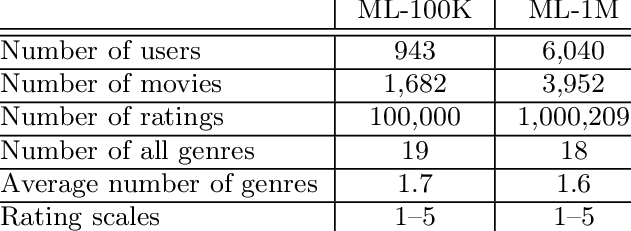

Liczba filmów jest wyzsza niz uzytkownikow, prawdopodobnie dlatego item-based jest lepszy.

Pakiet **surprise** pozwala również na automatyzację strojenia parametrów algorytmu. Do tego celu służy klasa *GridSearchCV*. Przykład automatycznego doboru parametrów dla algorytmu **UserKNN** został przedstawiony poniżej.

**Uwaga!** Kod wykonuje się ok. 4 min.


In [12]:
param_grid = {
  'k': [10, 20, 30, 40, 50], # liczba najbliższych sąsiadów
  'sim_options': {
      'name': ['cosine', 'msd', 'pearson'], # miary podobieństwa, które będą brane pod uwagę
      'user_based': [True] # czy podobieństwo użytkowników, czy itemów - w praktyce oznacza wersję UserKNN lub ItemKNN
  }
}
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=5) # ustawienie miar błędów oraz ilość foldów dla walidacji skrośnej
gs.fit(data)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson si

Obiekty klasy *GridSearchCV* zawierają słownik *cv_result*, który zawiera wartości miar błędów dla wszystkich podziałów walidacji skrośnej dla wszystkich kombinacji wartości parametrów.

In [13]:
results_df = pd.DataFrame(gs.cv_results)

# spłaszczenie słownika sim_options dla łatwiejszego tworzenia wykresów
results_df['sim_metric'] = results_df['param_sim_options'].apply(lambda x: x.get('name', None) if isinstance(x, dict) else None)
results_df['user_based'] = results_df['param_sim_options'].apply(lambda x: x.get('user_based', None) if isinstance(x, dict) else None)

print(results_df.head())

   split0_test_rmse  split1_test_rmse  split2_test_rmse  split3_test_rmse  \
0          1.039265          1.044078          1.043622          1.043746   
1          0.983675          0.990062          0.990252          0.987682   
2          1.034406          1.040439          1.039411          1.044257   
3          1.019049          1.026334          1.023810          1.023854   
4          0.972612          0.977963          0.977968          0.975493   

   split4_test_rmse  mean_test_rmse  std_test_rmse  rank_test_rmse  \
0          1.045904        1.043323       0.002190              15   
1          0.987804        0.987895       0.002371               5   
2          1.039737        1.039650       0.003144              14   
3          1.026003        1.023810       0.002602              13   
4          0.977491        0.976305       0.002060               1   

   split0_test_mae  split1_test_mae  ...  rank_test_mae  mean_fit_time  \
0         0.819095         0.822863  ...  

Available keys in filtered dict:  Index(['split0_test_rmse', 'split1_test_rmse', 'split2_test_rmse',
       'split3_test_rmse', 'split4_test_rmse', 'mean_test_rmse',
       'std_test_rmse', 'rank_test_rmse', 'split0_test_mae', 'split1_test_mae',
       'split2_test_mae', 'split3_test_mae', 'split4_test_mae',
       'mean_test_mae', 'std_test_mae', 'rank_test_mae', 'mean_fit_time',
       'std_fit_time', 'mean_test_time', 'std_test_time', 'params', 'param_k',
       'param_sim_options', 'sim_metric', 'user_based'],
      dtype='object')
Available keys in filtered dict:  Index(['split0_test_rmse', 'split1_test_rmse', 'split2_test_rmse',
       'split3_test_rmse', 'split4_test_rmse', 'mean_test_rmse',
       'std_test_rmse', 'rank_test_rmse', 'split0_test_mae', 'split1_test_mae',
       'split2_test_mae', 'split3_test_mae', 'split4_test_mae',
       'mean_test_mae', 'std_test_mae', 'rank_test_mae', 'mean_fit_time',
       'std_fit_time', 'mean_test_time', 'std_test_time', 'params', 'param

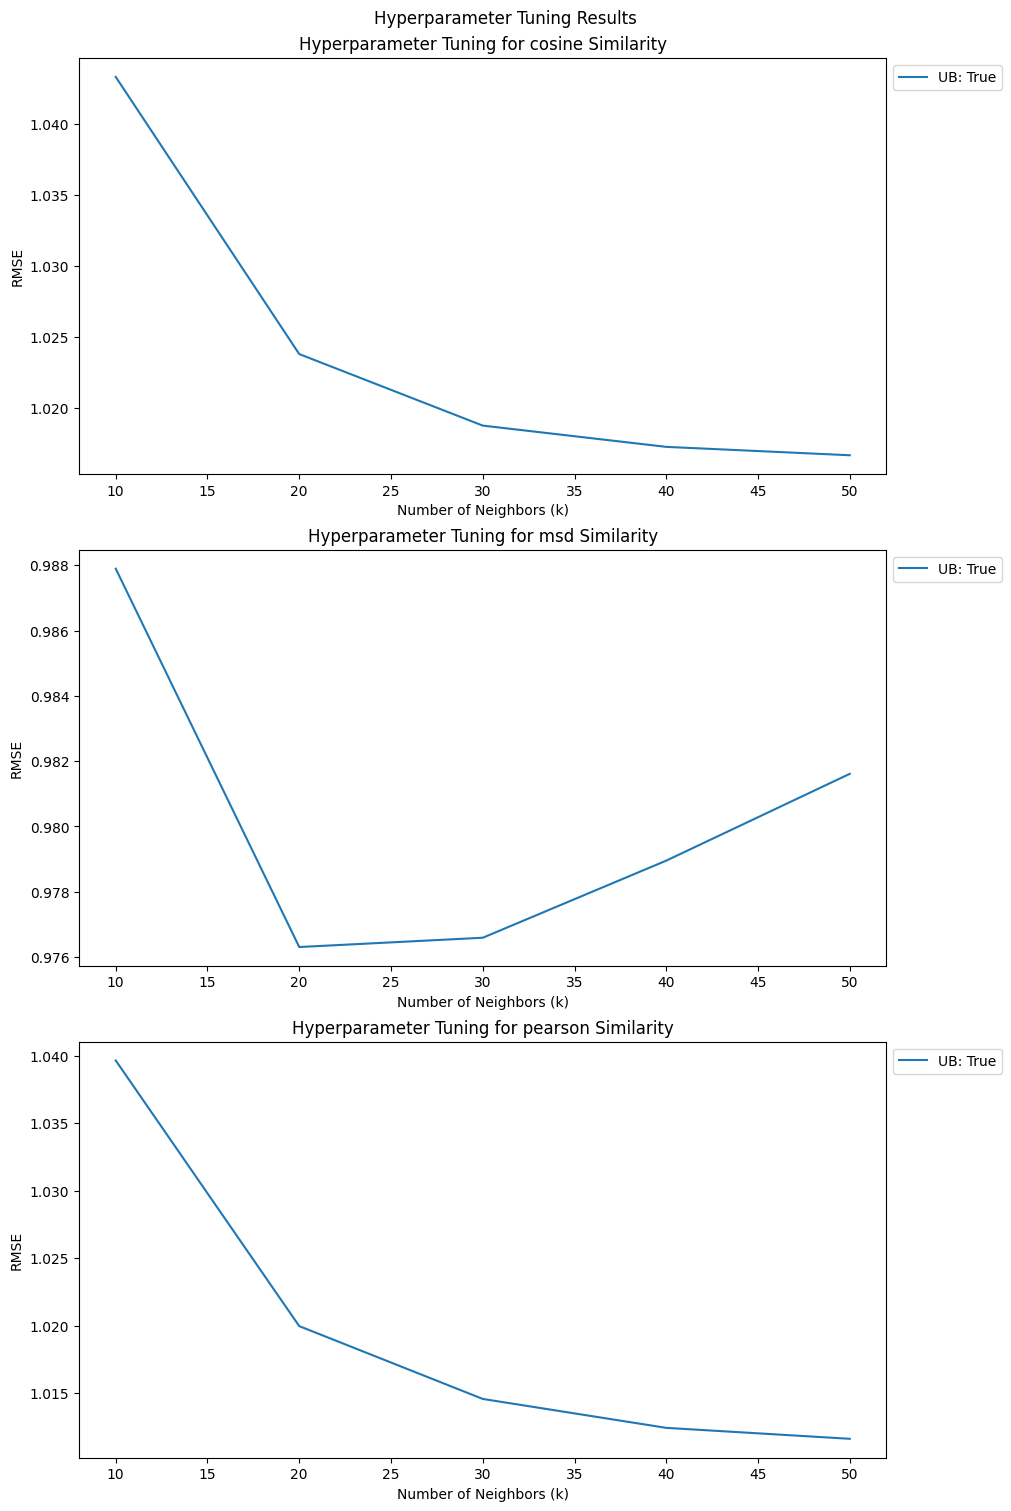

In [14]:
# Pobieranie unikatowych wartości parametrów
unique_metrics = results_df['sim_metric'].unique()
unique_user_based = results_df['user_based'].unique()

# Tworzenie wykresu dla każdej z miar podobieństwa
num_metrics = len(unique_metrics)
fig, axes = plt.subplots(num_metrics, 1, figsize=(10, 5 * num_metrics), constrained_layout=True)

if num_metrics == 1:
    axes = [axes]

for ax, metric in zip(axes, unique_metrics):
    for user_based in unique_user_based:
        filtered = results_df[
            (results_df['sim_metric'] == metric) &
            (results_df['user_based'] == user_based)
        ]

        if filtered.empty:
            print(f"No data for Metric={metric}, User-Based={user_based}")
            continue

        print("Available keys in filtered dict: ", filtered.keys())
        ax.plot(
            filtered['param_k'],
            filtered['mean_test_rmse'],
            label=f"UB: {user_based}"
        )

    ax.set_title(f'Hyperparameter Tuning for {metric} Similarity')
    ax.set_xlabel('Number of Neighbors (k)')
    ax.set_ylabel('RMSE')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.suptitle('Hyperparameter Tuning Results')
plt.savefig("params_tuning.jpg")
plt.show()

In [15]:
print(f"Best params: {gs.best_params['rmse']}")
print(f"Best RMSE: {gs.best_score['rmse']}")

Best params: {'k': 20, 'sim_options': {'name': 'msd', 'user_based': True}}
Best RMSE: 0.9763054036020066


## Zadanie 4. (2,5 pkt)
1. Narysuj analogiczne, co powyżej wykresy dla
*   MAE,
*   czasu.
2. Co możesz powiedzieć o otrzymanych wynikach? Czy któraś konfiguracja jest zawsze optymalna? Którą miarą najlepiej się kierować?


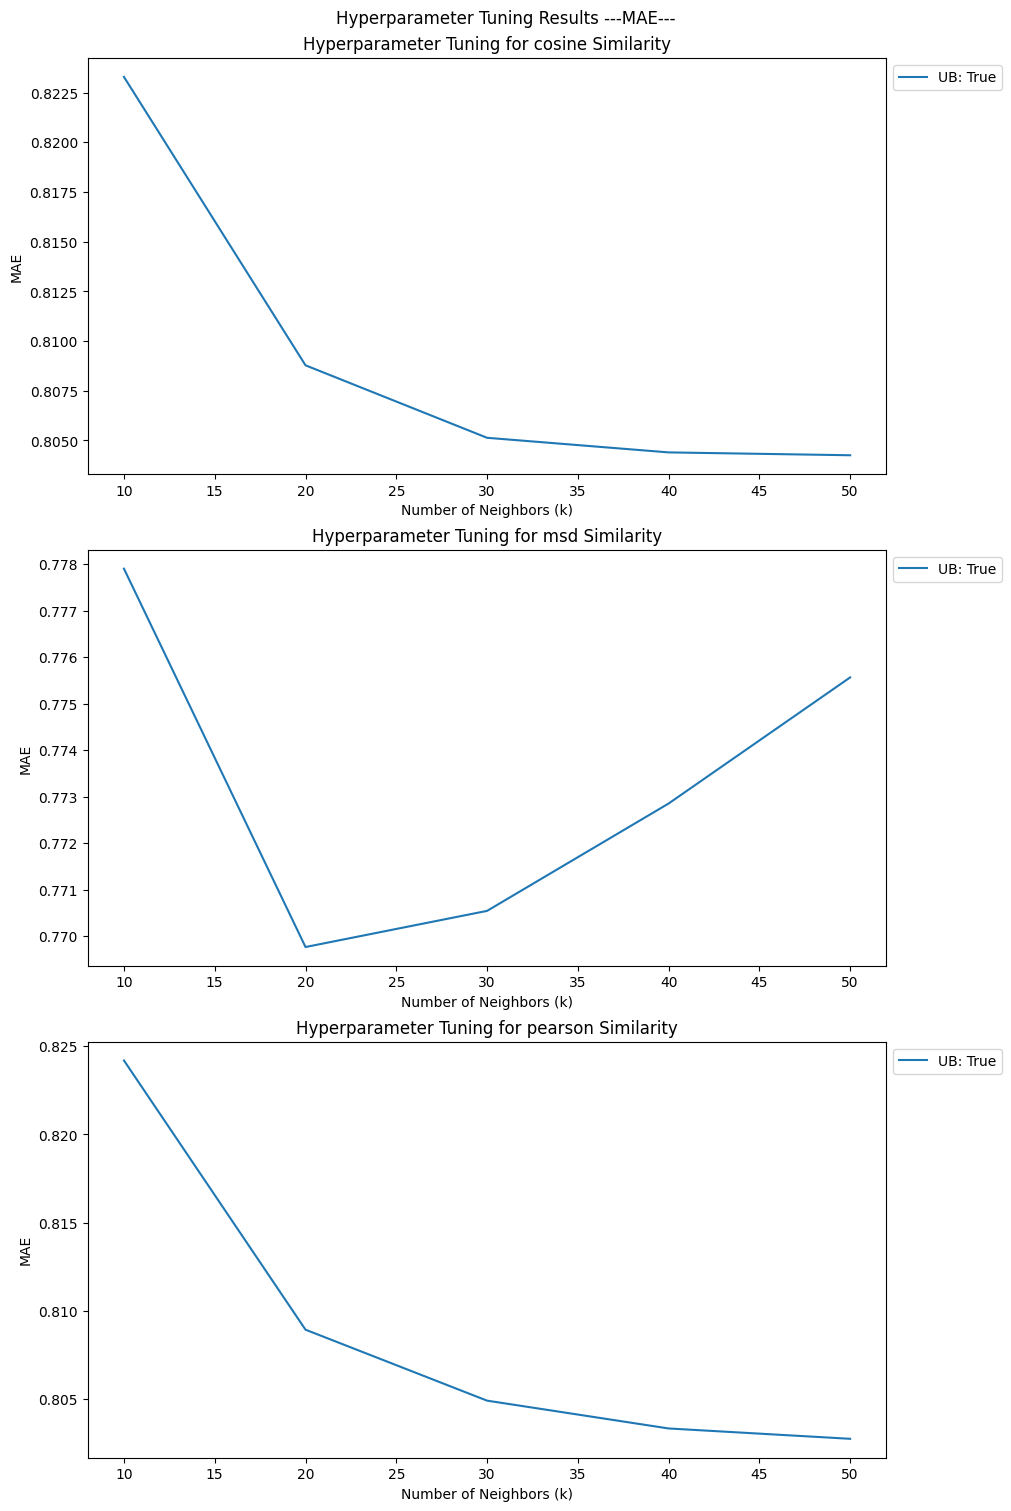

In [16]:
# Pobieranie unikatowych wartości parametrów
unique_metrics = results_df['sim_metric'].unique()
unique_user_based = results_df['user_based'].unique()

# Tworzenie wykresu dla każdej z miar podobieństwa
num_metrics = len(unique_metrics)
fig, axes = plt.subplots(num_metrics, 1, figsize=(10, 5 * num_metrics), constrained_layout=True)

if num_metrics == 1:
    axes = [axes]

for ax, metric in zip(axes, unique_metrics):
    for user_based in unique_user_based:
        filtered = results_df[
            (results_df['sim_metric'] == metric) &
            (results_df['user_based'] == user_based)
        ]

        if filtered.empty:
            print(f"No data for Metric={metric}, User-Based={user_based}")
            continue

        ax.plot(
            filtered['param_k'],
            filtered['mean_test_mae'],
            label=f"UB: {user_based}"
        )

    ax.set_title(f'Hyperparameter Tuning for {metric} Similarity')
    ax.set_xlabel('Number of Neighbors (k)')
    ax.set_ylabel('MAE')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.suptitle('Hyperparameter Tuning Results ---MAE---')
plt.savefig("params_tuning.jpg")

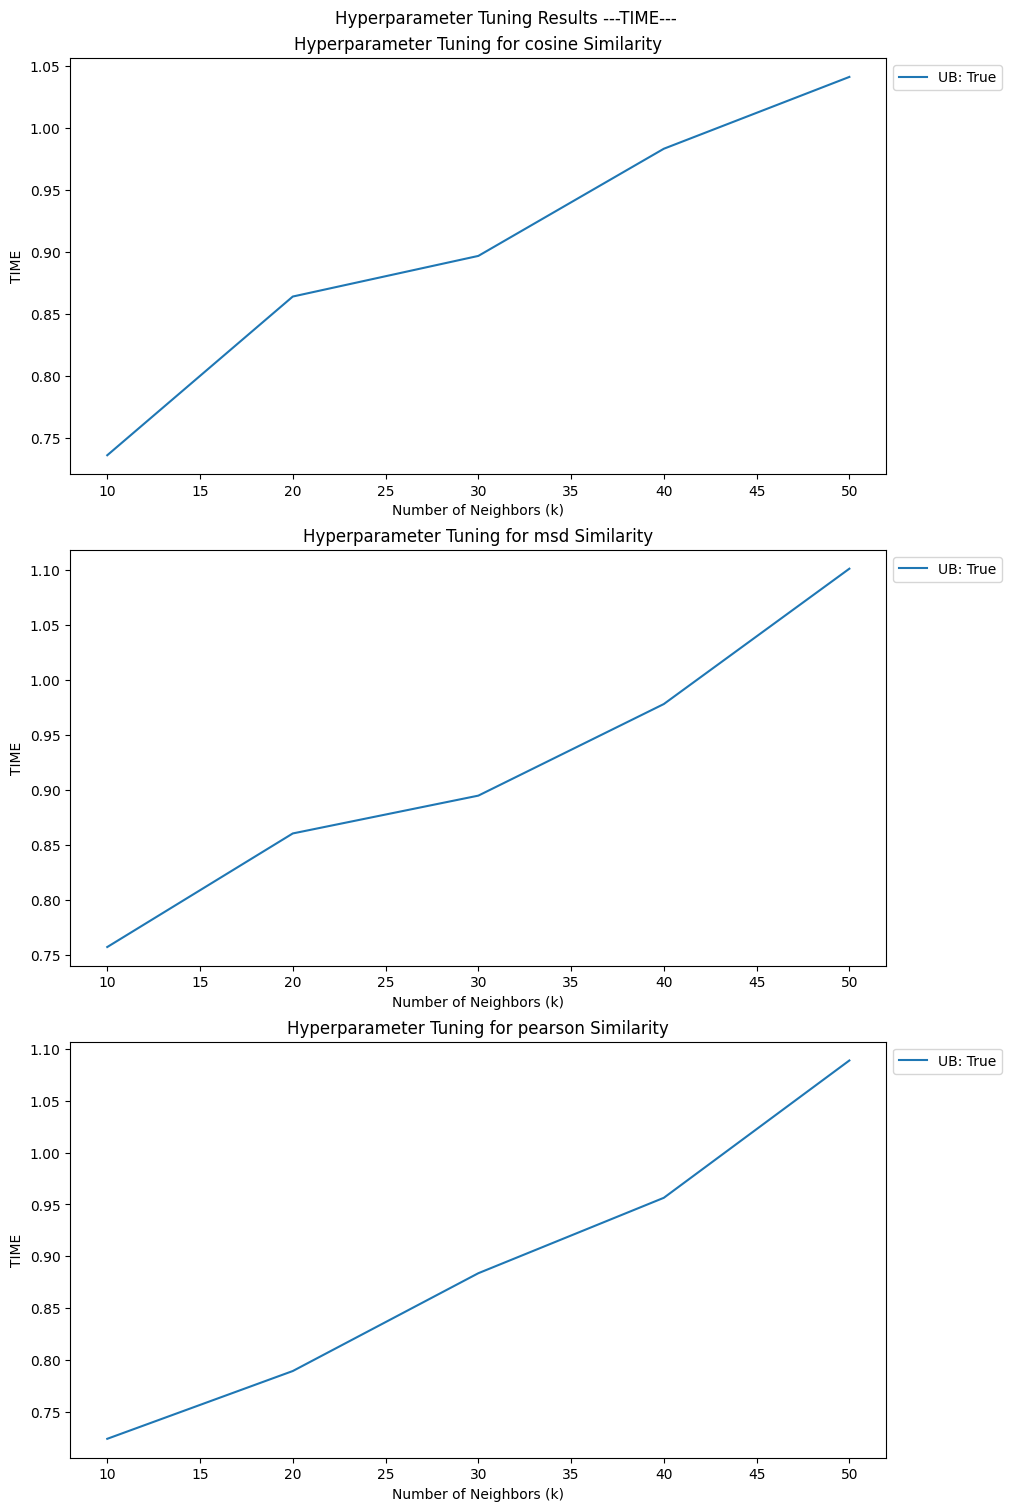

In [17]:
# Pobieranie unikatowych wartości parametrów
unique_metrics = results_df['sim_metric'].unique()
unique_user_based = results_df['user_based'].unique()

# Tworzenie wykresu dla każdej z miar podobieństwa
num_metrics = len(unique_metrics)
fig, axes = plt.subplots(num_metrics, 1, figsize=(10, 5 * num_metrics), constrained_layout=True)

if num_metrics == 1:
    axes = [axes]

for ax, metric in zip(axes, unique_metrics):
    for user_based in unique_user_based:
        filtered = results_df[
            (results_df['sim_metric'] == metric) &
            (results_df['user_based'] == user_based)
        ]

        if filtered.empty:
            print(f"No data for Metric={metric}, User-Based={user_based}")
            continue

        ax.plot(
            filtered['param_k'],
            filtered['mean_test_time'],
            label=f"UB: {user_based}"
        )

    ax.set_title(f'Hyperparameter Tuning for {metric} Similarity')
    ax.set_xlabel('Number of Neighbors (k)')
    ax.set_ylabel('TIME')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.suptitle('Hyperparameter Tuning Results ---TIME---')
plt.savefig("params_tuning.jpg")

*Miejsce na odpowiedź 2.*



> Tutaj



---



## Zadanie 5 (2 pkt)
Znajdź optymalne hiperparametry dla algorytmu ItemKNN względem miar błędu i czasu. Zwizualizuj wyniki analizy na wykresie.

In [18]:
param_grid = {
  'k': [10, 20, 30, 40, 50], # liczba najbliższych sąsiadów
  'sim_options': {
      'name': ['cosine', 'msd', 'pearson'], # miary podobieństwa, które będą brane pod uwagę
      'user_based': [False] # czy podobieństwo użytkowników, czy itemów - w praktyce oznacza wersję UserKNN lub ItemKNN
  }
}
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=5) # ustawienie miar błędów oraz ilość foldów dla walidacji skrośnej
gs.fit(data)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson si

In [19]:
results_df = pd.DataFrame(gs.cv_results)

# spłaszczenie słownika sim_options dla łatwiejszego tworzenia wykresów
results_df['sim_metric'] = results_df['param_sim_options'].apply(lambda x: x.get('name', None) if isinstance(x, dict) else None)
results_df['user_based'] = results_df['param_sim_options'].apply(lambda x: x.get('user_based', None) if isinstance(x, dict) else None)

print(results_df.head())

   split0_test_rmse  split1_test_rmse  split2_test_rmse  split3_test_rmse  \
0          1.099545          1.097205          1.097908          1.093546   
1          1.017270          1.012113          1.012150          1.012081   
2          1.116799          1.113118          1.110339          1.103252   
3          1.053932          1.053120          1.044965          1.047524   
4          0.987694          0.986150          0.980442          0.981099   

   split4_test_rmse  mean_test_rmse  std_test_rmse  rank_test_rmse  \
0          1.091758        1.095992       0.002887              14   
1          1.007178        1.012159       0.003192               5   
2          1.102926        1.109287       0.005461              15   
3          1.044273        1.048763       0.004045              11   
4          0.978456        0.982768       0.003535               4   

   split0_test_mae  split1_test_mae  ...  rank_test_mae  mean_fit_time  \
0         0.871429         0.867286  ...  

In [31]:
print(f"Best RMSE: {gs.best_score['rmse']}")
print(f"Best params: {gs.best_params['rmse']}")
    
print(f"Best MAE: {gs.best_score['mae']}")
print(f"Best params: {gs.best_params['mae']}")

Best RMSE: 0.9749486599160321
Best params: {'k': 40, 'sim_options': {'name': 'msd', 'user_based': False}}
Best MAE: 0.7702298431428525
Best params: {'k': 40, 'sim_options': {'name': 'msd', 'user_based': False}}


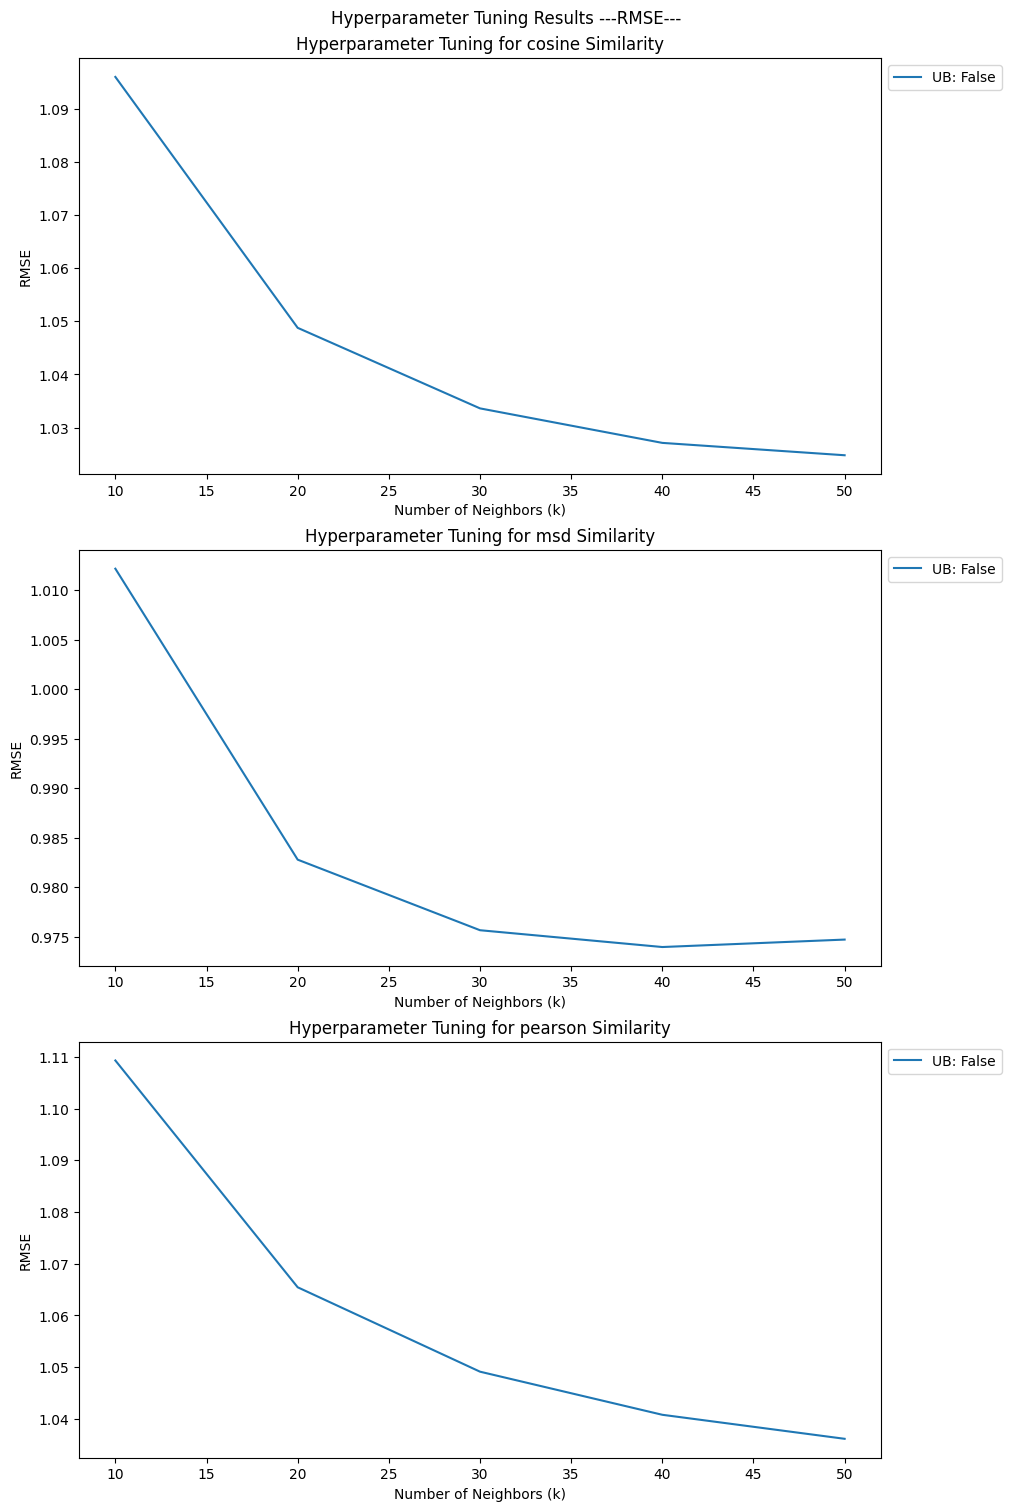

In [20]:
# Pobieranie unikatowych wartości parametrów
unique_metrics = results_df['sim_metric'].unique()
unique_user_based = results_df['user_based'].unique()

# Tworzenie wykresu dla każdej z miar podobieństwa
num_metrics = len(unique_metrics)
fig, axes = plt.subplots(num_metrics, 1, figsize=(10, 5 * num_metrics), constrained_layout=True)

if num_metrics == 1:
    axes = [axes]

for ax, metric in zip(axes, unique_metrics):
    for user_based in unique_user_based:
        filtered = results_df[
            (results_df['sim_metric'] == metric) &
            (results_df['user_based'] == user_based)
        ]

        if filtered.empty:
            print(f"No data for Metric={metric}, User-Based={user_based}")
            continue

        ax.plot(
            filtered['param_k'],
            filtered['mean_test_rmse'],
            label=f"UB: {user_based}"
        )

    ax.set_title(f'Hyperparameter Tuning for {metric} Similarity')
    ax.set_xlabel('Number of Neighbors (k)')
    ax.set_ylabel('RMSE')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.suptitle('Hyperparameter Tuning Results ---RMSE---')
plt.savefig("params_tuning.jpg")

## Zadanie 6. (3 pkt)
1.   Napisz własną implementację naiwnego algorytmu najwyżej oceniane.
2.   Porównaj wyniki z wyznaczoną wcześniej najlepszą wersją algorytmu kNN. Co możesz powiedzieć o tych wynikach?



In [63]:
print("Najlepszy byl: Best params: {'k': 40, 'sim_options': {'name': 'msd', 'user_based': False}}")



# def predict_(u, i):
#     sum_ur=0
#     counter=0
#     for ratings in trainset.all_ratings():
#         if ratings[1] == i:
#             sum_ur+=ratings[2]
#             counter+=1

#     if counter==0:
#         return 0
#     return sum_ur/counter

# ctr=0
# for t in testset:
#     print(f"{ctr}/{len(testset)}")
#     mae += abs(predict_(int(t[0]),int(t[1])) - t[2])
#     ctr+=1

# mae/=ctr
# print("Uzyskane MAE: ", mae)



Najlepszy byl: Best params: {'k': 40, 'sim_options': {'name': 'msd', 'user_based': False}}


In [ ]:
item_avg = {}
item_num = {}
for ratings in trainset.all_ratings():
    item_avg[ratings[1]] = item_avg.get(ratings[1], 0) + ratings[2]
    item_num[ratings[1]] = item_num.get(ratings[1], 0) + 1

for r in item_avg.keys():
    item_avg[r] = item_avg[r]/item_num[r]

mae = 0
ctr=0
for t in testset:
    #print(f"AVG dla i {int(t[1])}: {item_avg[(int(t[1]))]}, ocena realna: {t[2]}")
    mae += abs(item_avg[int(t[0])] - t[2])
    ctr+=1
mae/= len(testset)
print("Uzyskane MAE: ", mae)
print("MAE z biblioteki na trainsecie: ", gs.best_score['mae'])

Uzyskane MAE:  1.0575663797621262
MAE z biblioteki na trainsecie:  0.7692044452409577


In [ ]:
from surprise import AlgoBase, Dataset
from surprise.model_selection import cross_validate

class MyOwnAlgorithm(AlgoBase):
    def __init__(self):
        # Always call base method before doing anything.
        AlgoBase.__init__(self)

        self.item_avg = {}
        self.item_num = {}
        for ratings in trainset.all_ratings():
            self.item_avg[ratings[1]] = self.item_avg.get(ratings[1], 0) + ratings[2]
            self.item_num[ratings[1]] = self.item_num.get(ratings[1], 0) + 1

        for r in item_avg.keys():
            self.item_avg[r] = self.item_avg[r]/self.item_num[r]

    def estimate(self, u, i):
        return self.item_avg.get(i,0)

algo = MyOwnAlgorithm()
cross_validate(algo, data)

{'test_rmse': array([1.2563257 , 1.27099204, 1.26594276, 1.26584862, 1.27636627]),
 'test_mae': array([1.02188275, 1.02276747, 1.02664828, 1.02566595, 1.03140502]),
 'fit_time': (3.0994415283203125e-06,
  0.005200862884521484,
  0.00485992431640625,
  0.005078792572021484,
  0.004302024841308594),
 'test_time': (0.019461870193481445,
  0.019188880920410156,
  0.018766164779663086,
  0.019237279891967773,
  0.0710151195526123)}